In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

In [2]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

In [3]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [4]:
# data = []
# datasetnum = len(df.dataset.unique())
# for i in df.dataset.unique():
#     data.append(df.loc[df['dataset']==i])

In [8]:
# fig, ax = plt.subplots(4,1,figsize=(6,6))
# ax = ax.ravel()
# for i in range(datasetnum):
#     print(i)
#     ax[i].plot(data[i]['x'].values,data[i]['y'].values,'ro')

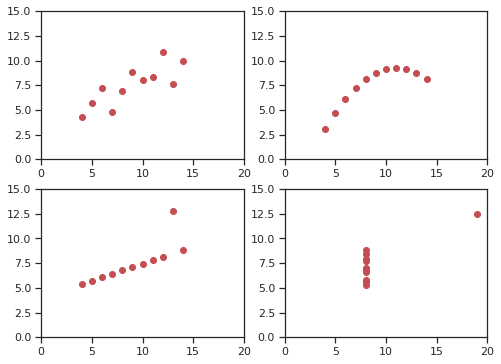

In [11]:
fig, ax = plt.subplots(2,2,figsize=(8,6))
ax = ax.ravel()

for i,val in enumerate(df.dataset.unique()):
    
    x = df.loc[df.dataset == val, 'x']
    y = df.loc[df.dataset == val, 'y']
    
    ax[i].plot(x, y, 'ro')
    ax[i].set_xlim([0,20])
    ax[i].set_ylim([0,15])

In [12]:
from sklearn.linear_model import LinearRegression

In [22]:
df.loc[df.dataset == 'I', 'x'].values.reshape(-1, 1)

array([[10.],
       [ 8.],
       [13.],
       [ 9.],
       [11.],
       [14.],
       [ 6.],
       [ 4.],
       [12.],
       [ 7.],
       [ 5.]])

In [19]:
import numpy as np

In [20]:
x = 30 * np.random.random((20, 1))

In [21]:
x

array([[ 5.02357571],
       [ 1.53158668],
       [ 6.34161175],
       [21.33997329],
       [11.87036247],
       [ 7.28887298],
       [27.3219909 ],
       [ 4.19758674],
       [ 9.84395649],
       [27.13023118],
       [25.57413437],
       [27.4311929 ],
       [ 3.82772077],
       [23.70987725],
       [11.60698745],
       [20.6306113 ],
       [18.23190601],
       [23.45024364],
       [13.93971325],
       [ 1.27602067]])

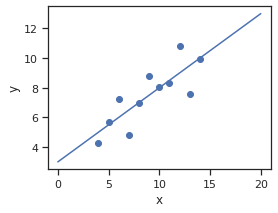

In [24]:
model = LinearRegression()

#model.fit(x, y)
x = df.loc[df.dataset == 'I', 'x'].values.reshape(-1, 1)
y = df.loc[df.dataset == 'I', 'y'].values.reshape(-1, 1)
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 20, 100)
# y_new = model.predict(x_new[:, np.newaxis])
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

[3.00009091] [[0.50009091]]
[3.00090909] [[0.5]]
[3.00245455] [[0.49972727]]
[3.00172727] [[0.49990909]]


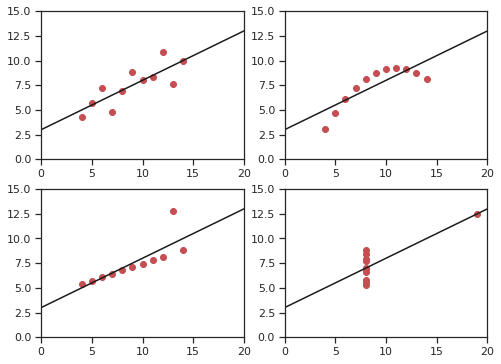

In [29]:
model = LinearRegression()

fig, ax = plt.subplots(2,2,figsize=(8,6))
ax = ax.ravel()

for i,val in enumerate(df.dataset.unique()):
    
    #model.fit(x, y)
    x = df.loc[df.dataset == val, 'x'].values.reshape(-1, 1)
    y = df.loc[df.dataset == val, 'y'].values.reshape(-1, 1)
    
    model.fit(x, y)
    print(model.intercept_, model.coef_)
    
    # predict y from the data
    x_new = np.linspace(0, 20, 100).reshape(-1, 1)
    y_new = model.predict(x_new)

    ax[i].plot(x, y, 'ro')
    ax[i].plot(x_new, y_new, 'k-')

    ax[i].set_xlim([0,20])
    ax[i].set_ylim([0,15])

In [38]:
import ipywidgets
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
def findline(dataset='I'):
    
    model = LinearRegression()

    fig, ax = plt.subplots(figsize=(5,5))

    #model.fit(x, y)
    x = df.loc[df.dataset == dataset, 'x'].values.reshape(-1, 1)
    y = df.loc[df.dataset == dataset, 'y'].values.reshape(-1, 1)

    if dataset == 'II':
        y[:] = 3 + 0.5*x[:]
        
    model.fit(x, y)
    #print(model.intercept_, model.coef_)
    
    # predict y from the data
    x_new = np.linspace(0, 20, 100).reshape(-1, 1)
    y_new = model.predict(x_new)
    
    y_pred = model.predict(x)
    print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))
    print('R^2: %.2f' % r2_score(y, y_pred))

    ax.plot(x, y, 'ro')
    ax.plot(x_new, y_new, 'k-')

    ax.set_xlim([0,20])
    ax.set_ylim([0,15])
    
ipywidgets.interactive(findline, dataset = df.dataset.unique())

interactive(children=(Dropdown(description='dataset', options=('I', 'II', 'III', 'IV'), value='I'), Output()),…

In [46]:
import pandas as pd

In [49]:
dinodf = pd.read_csv('data/DatasaurusDozen.tsv',sep='\t')

In [50]:
dinodf

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


In [52]:
dinodf[dinodf.dataset=='dino']

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333
...,...,...,...
137,dino,39.4872,25.3846
138,dino,91.2821,41.5385
139,dino,50.0000,95.7692
140,dino,47.9487,95.0000


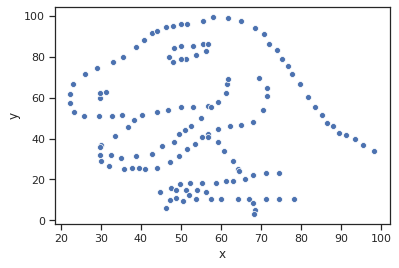

In [55]:
sns.scatterplot(data=dinodf[dinodf.dataset=='dino'], x='x', y='y')

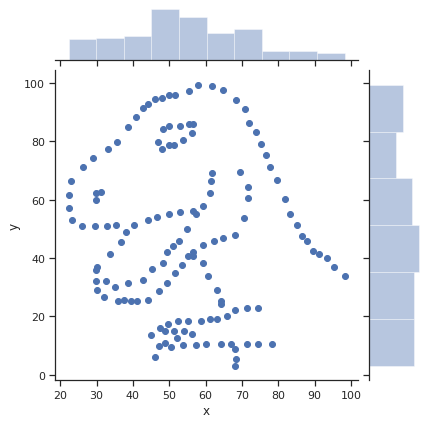

In [56]:
sns.jointplot(data=dinodf[dinodf.dataset=='dino'], x='x', y='y')

In [79]:
np.corrcoef(dinodf.loc[dinodf.dataset=='dino','x'],dinodf.loc[dinodf.dataset=='dino','y'])[0,1]

-0.06447185270095167

In [75]:
xmean

NameError: name 'xmean' is not defined

In [84]:
def snsdino(dataset='dino'):
    sns.jointplot(data=dinodf[dinodf.dataset==dataset], x='x', y='y', marginal_kws=dict(bins=15))
    x = dinodf.loc[dinodf.dataset==dataset,'x'].values
    y = dinodf.loc[dinodf.dataset==dataset,'y'].values
    xmean = x.mean()
    ymean = y.mean()
    xstd = x.std()
    ystd = y.std()
    corr = np.corrcoef(x,y)[0,1]
    print('''
    X Mean: {:.2f}
    Y Mean: {:.2f}
    X StdDev: {:.2f}
    Y StdDev: {:.2f}
    Corr: {:.2f}'''.format(xmean,ymean,xstd,ystd,corr))
    
ipywidgets.interactive(snsdino, dataset = dinodf.dataset.unique())

interactive(children=(Dropdown(description='dataset', options=('dino', 'away', 'h_lines', 'v_lines', 'x_shape'…

In [85]:
from IPython.display import clear_output

In [117]:
out = ipywidgets.Output()    
def snsdino(dataset='dino'):
    
    msg = ''
    with out:
        clear_output(wait=True)
        x = dinodf.loc[dinodf.dataset==dataset,'x'].values
        y = dinodf.loc[dinodf.dataset==dataset,'y'].values
        xmean = x.mean()
        ymean = y.mean()
        xstd = x.std()
        ystd = y.std()
        corr = np.corrcoef(x,y)[0,1]
        msg = '''
        X Mean: {:.2f}
        Y Mean: {:.2f}
        X StdDev: {:.2f}
        Y StdDev: {:.2f}
        Corr: {:.2f}'''.format(xmean,ymean,xstd,ystd,corr)
        
        x = sns.jointplot(data=dinodf[dinodf.dataset==dataset], x='x', y='y', 
                      marginal_kws=dict(bins=15))#,
#                       annot_kws=dict(text=(1.0, 0.25, msg, fontsize=14, transform=plt.gcf().transFigure)))
                      #annot_kws=dict(1.0, 0.25, msg, fontsize=14, transform=plt.gcf().transFigure))
        x.text(1, 1, "An annotation")

        #display(x)
    
ipywidgets.interactive(snsdino, dataset = dinodf.dataset.unique())

interactive(children=(Dropdown(description='dataset', options=('dino', 'away', 'h_lines', 'v_lines', 'x_shape'…

In [63]:
data[3]['y'].values

array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,
        7.91,  6.89])

In [19]:
sns.FacetGrid(data=df, x='x', y='y', col='dataset');

TypeError: __init__() got an unexpected keyword argument 'x'

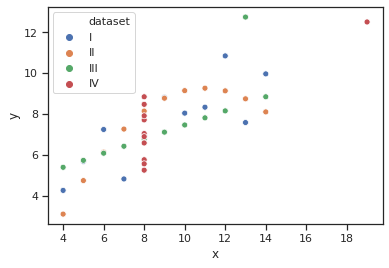

In [17]:
sns.scatterplot(data=df, x='x', y='y', hue='dataset');

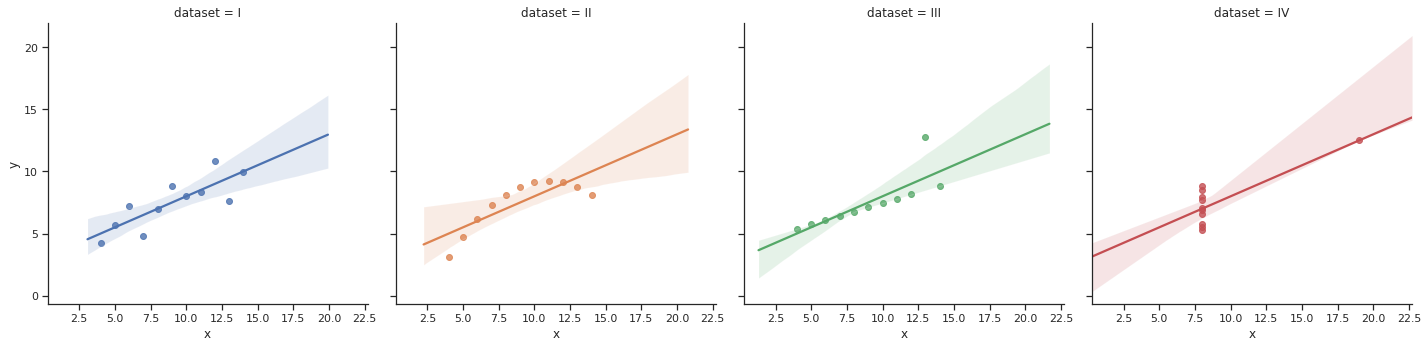

In [5]:
# Show the results of a linear regression within each dataset
sns.lmplot(data=df, x="x", y="y",
           col="dataset", hue="dataset")
# , 
#            col_wrap=2, ci=None, palette="muted", height=4,
#            scatter_kws={"s": 50, "alpha": 1})